In [1]:
import tensorflow as tf
# from tensorflow import keras
import tensorflow.keras as keras
print(tf.__version__)

print(keras.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import Sequence

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


<ipython-input-3-46a6cc959b06>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
<ipython-input-3-46a6cc959b06>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [7]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# X_train = pd.DataFrame(X_train)
# y_train = pd.DataFrame(y_train)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4892 - accuracy: 0.7723 - val_loss: 0.3947 - val_accuracy: 0.8068
Epoch 2/100
943/943 [==============================] - 1s 963us/step - loss: 0.3903 - accuracy: 0.8053 - val_loss: 0.3785 - val_accuracy: 0.8082
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3784 - accuracy: 0.8113 - val_loss: 0.3759 - val_accuracy: 0.8175
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3677 - accuracy: 0.8208 - val_loss: 0.3699 - val_accuracy: 0.8149
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3713 - accuracy: 0.8152 - val_loss: 0.3682 - val_accuracy: 0.8118
Epoch 6/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8147 - val_loss: 0.3629 - val_accuracy: 0.8185
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3709 - accuracy: 0.8124 - val_loss: 0.3732 - val_accuracy: 0.81

Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3619 - accuracy: 0.8156 - val_loss: 0.3666 - val_accuracy: 0.8143
Epoch 59/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3629 - accuracy: 0.8160 - val_loss: 0.3670 - val_accuracy: 0.7973
Epoch 60/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3623 - accuracy: 0.8167 - val_loss: 0.3679 - val_accuracy: 0.8147
Epoch 61/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3654 - accuracy: 0.8158 - val_loss: 0.3720 - val_accuracy: 0.8129
Epoch 62/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3669 - accuracy: 0.8138 - val_loss: 0.3663 - val_accuracy: 0.8155
Epoch 63/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3627 - accuracy: 0.8161 - val_loss: 0.3646 - val_accuracy: 0.8141
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3605 - accuracy: 0.8171 - val_loss: 0.3628 - val_accuracy:

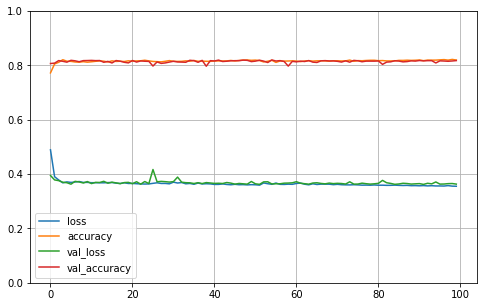

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 596us/step - loss: 0.3631 - accuracy: 0.8175


[0.363127201795578, 0.8175298571586609]

In [10]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8175298804780876

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history2 = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32, epochs=100)
model.evaluate(X_test_scaled, y_test)
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test_scaled))

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.5066 - accuracy: 0.7839 - val_loss: 0.3411 - val_accuracy: 0.8421
Epoch 2/100
943/943 [==============================] - 1s 942us/step - loss: 0.3305 - accuracy: 0.8459 - val_loss: 0.3360 - val_accuracy: 0.8413
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3234 - accuracy: 0.8495 - val_loss: 0.3282 - val_accuracy: 0.8481
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3202 - accuracy: 0.8514 - val_loss: 0.3270 - val_accuracy: 0.8459
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3179 - accuracy: 0.8528 - val_loss: 0.3257 - val_accuracy: 0.8462
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3154 - accuracy: 0.8541 - val_loss: 0.3252 - val_accuracy: 0.8464
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3138 - accuracy: 0.8542 - val_loss: 0.3239 - val_accuracy: 0.84

Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2600 - accuracy: 0.8777 - val_loss: 0.3770 - val_accuracy: 0.8473
Epoch 59/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2591 - accuracy: 0.8804 - val_loss: 0.3788 - val_accuracy: 0.8437
Epoch 60/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2586 - accuracy: 0.8783 - val_loss: 0.3753 - val_accuracy: 0.8435
Epoch 61/100
943/943 [==============================] - 1s 900us/step - loss: 0.2576 - accuracy: 0.8787 - val_loss: 0.3750 - val_accuracy: 0.8394
Epoch 62/100
943/943 [==============================] - 1s 974us/step - loss: 0.2572 - accuracy: 0.8792 - val_loss: 0.3819 - val_accuracy: 0.8433
Epoch 63/100
943/943 [==============================] - 1s 908us/step - loss: 0.2564 - accuracy: 0.8790 - val_loss: 0.3829 - val_accuracy: 0.8404
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.2558 - accuracy: 0.8804 - val_loss: 0.3813 - val_acc

0.8398406374501992

# Zad. 
Stwórz wykres porównujący metody. 

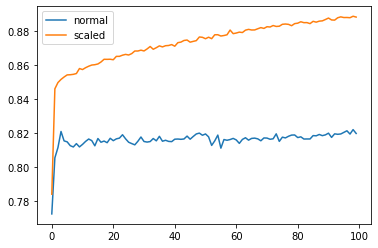

In [12]:
plt.plot(pd.DataFrame(history.history['accuracy']), label='normal')
plt.plot(pd.DataFrame(history2.history['accuracy']), label='scaled')
plt.legend()
plt.show()